# Sentiment Analysis - Solutions

In this tutorial we will be working with the transcriptions of general debates at the United Nations from 1970 to 2016. We will try to see whether the fall of the iron curtain changed the debates.

This tutorial will focus on the sentiment

## Packages

In [1]:
InstallPackages = False
if InstallPackages:
    !pip install pandas
    !pip install numpy
    !pip install seaborn
    !pip install matplotlib
    !pip install germansentiment
    !pip install transformers

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
from germansentiment import SentimentModel

In [5]:
from transformers import pipeline

## Seed

In [6]:
seed = 42

## Read the Data
Read in the pre-processed 03.1 un-general-debates.csv file and set it to a data frame called df.

**Note:** We will focus on the subset of the German states GDR and BRD with the country codes DEU and DDR, respectively, and USA and Russia with the country codes 'USA' and 'RUS', respectively.


In [7]:
df = pd.read_csv('Data/03.1 un-general-debates.csv')

Use info on df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   session   7507 non-null   int64 
 1   year      7507 non-null   int64 
 2   country   7507 non-null   object
 3   text      7507 non-null   object
 4   document  7507 non-null   object
dtypes: int64(2), object(3)
memory usage: 293.4+ KB


Check the head of ad_data

In [9]:
df.head()

,session,year,country,text,document
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...,indeed pleasure member delegation extend ambas...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",may begin congratulate sir election presidency...
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",mr president particular pleasure behalf delega...
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...,debate fortieth session general assembly four ...
4,44,1989,ZWE,﻿I should like at the outset to express my del...,like outset express delegation satisfaction pl...


Focus on the some countries for memory reasons

In [10]:
where = df['country'].isin(['DDR','DEU','USA','RUS'])

In [11]:
df = df[where]

In [12]:
df

,session,year,country,text,document
7,44,1989,RUS,﻿My task as head of the delegation of the Sovi...,task head delegation soviet union general asse...
110,44,1989,DEU,"﻿\nI congratulate you, Sir, on your election a...",congratulate sir election president general as...
124,44,1989,USA,﻿I am honoured to address the General Assembly...,honour address general assembly today beginnin...
128,44,1989,DDR,"﻿May I congratulate you, Sir, on your election...",may congratulate sir election president forty ...
161,25,1970,USA,1.\t It is my privilege to extend to you once ...,1 privilege extend warm congratulation united ...
...,...,...,...,...,...
7257,62,2007,RUS,"Traditionally, the General Assembly sums up \n...",traditionally general assembly sum result end ...
7277,62,2007,DEU,"Please accept my congratulations, Mr. Preside...",please accept congratulation mr president elec...
7369,56,2001,RUS,﻿This session of the General Assembly is\ntaki...,session general assembly take place shadow unp...
7473,56,2001,DEU,"﻿Only a few moments ago, we were informed of t...",moment ago inform crash commercial airliner fa...


In [13]:
df = df.reset_index(drop=True)

In [14]:
df

,session,year,country,text,document
0,44,1989,RUS,﻿My task as head of the delegation of the Sovi...,task head delegation soviet union general asse...
1,44,1989,DEU,"﻿\nI congratulate you, Sir, on your election a...",congratulate sir election president general as...
2,44,1989,USA,﻿I am honoured to address the General Assembly...,honour address general assembly today beginnin...
3,44,1989,DDR,"﻿May I congratulate you, Sir, on your election...",may congratulate sir election president forty ...
4,25,1970,USA,1.\t It is my privilege to extend to you once ...,1 privilege extend warm congratulation united ...
...,...,...,...,...,...
147,62,2007,RUS,"Traditionally, the General Assembly sums up \n...",traditionally general assembly sum result end ...
148,62,2007,DEU,"Please accept my congratulations, Mr. Preside...",please accept congratulation mr president elec...
149,56,2001,RUS,﻿This session of the General Assembly is\ntaki...,session general assembly take place shadow unp...
150,56,2001,DEU,"﻿Only a few moments ago, we were informed of t...",moment ago inform crash commercial airliner fa...


## Exercise 1 - Write a function to conduct the Sentiment Analysis

**Note:** Below, I provide a sentiment anaylsis in german.

In [15]:
#sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
sentiment_pipeline = pipeline("sentiment-analysis",model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to get sentiment probabilities
def sentiment_analysis(text):
    # Get the sentiment analysis results
    results = sentiment_pipeline(text)
    
    # Initialize a dictionary to store probabilities. Note, in the model, the focus is on the positive sentiment.
    sentiment_probabilities = {"positive": 0.0, "neutral": 0.0, "negative": 0.0}
    
    # Map the results to our dictionary
    for result in results:
        label = result['label'].lower()
        if label == 'positive':
            sentiment_probabilities['positive'] = result['score']
        elif label == 'negative':
            sentiment_probabilities['negative'] = result['score']
        else:
            sentiment_probabilities['neutral'] = result['score']    
    
    return sentiment_probabilities

In [16]:
# Function to get sentiment probabilities
def sentiment_analysis_english(statements):
    
    #define the results
    positive = []
    neutral = []
    negative = []
    
    #compute the results
    for i in range(0,len(statements)):
        probabilities = sentiment_analysis(statements[i][:500])
        positive.append(probabilities['positive'])
        neutral.append(probabilities['neutral'])
        negative.append(probabilities['negative'])   
    
    #return the data frame
    sentiment = pd.DataFrame({'positive': positive, 'neutral': neutral, 'negative': negative})
    
    return sentiment

Sentiment anaylsis in german for your term paper

In [17]:
def sentiment_analysis_german(statements):
    
    """
    
    This function returns the probabilities, classes and class_val for each document
    
    """
    
    #build the model
    model = SentimentModel()
    
    #predict the sentiments using BERT
    classes, probabilities = model.predict_sentiment(statements.to_list(), output_probabilities = True)
    
    #assign the probabilities
    sentiment = pd.DataFrame(probabilities)
    
    #get the probabilities
    sentiment.loc[:,"positive"] = [sentiment.loc[i,0][1] for i in range(0, len(sentiment))]
    sentiment.loc[:,"negative"] = [sentiment.loc[i,1][1] for i in range(0, len(sentiment))]
    sentiment.loc[:,"neutral"] = [sentiment.loc[i,2][1] for i in range(0, len(sentiment))]
        
    #get the class
    sentiment.loc[:,"class"] = classes
    
    #get the class vals
    class_list = []

    for i in range(0, len(sentiment)):
        value = sentiment.loc[i, "class"]
        if value == "negative":
            class_list.append(-1)
        elif value == "positive":
            class_list.append(1)
        else:
            class_list.append(0)

    sentiment.loc[:,"class_val"] = class_list
    
    #return df without the sentiment list columns
    return sentiment.iloc[:, 3:(sentiment.shape[1])]
    

## Exercise 3 - Conduct the Sentiment Analysis and concat the data

Not it's time to conduct the sentiment analysis.

In [18]:
sentiment = sentiment_analysis_english(df['document'])

In [19]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   positive  152 non-null    float64
 1   neutral   152 non-null    float64
 2   negative  152 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [20]:
sentiment.head()

,positive,neutral,negative
0,0.998531,0.0,0.0
1,0.997747,0.0,0.0
2,0.984830,0.0,0.0
3,0.945445,0.0,0.0
4,0.995857,0.0,0.0


In [21]:
sentiment.describe()

,positive,neutral,negative
count,152.000000,152.0,152.000000
mean,0.857405,0.0,0.094768
std,0.311047,0.0,0.272154
min,0.000000,0.0,0.000000
25%,0.937842,0.0,0.000000
50%,0.986735,0.0,0.000000
75%,0.995827,0.0,0.000000
max,0.999392,0.0,0.979528


concat the data

In [22]:
df = pd.concat([df,sentiment], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   session   152 non-null    int64  
 1   year      152 non-null    int64  
 2   country   152 non-null    object 
 3   text      152 non-null    object 
 4   document  152 non-null    object 
 5   positive  152 non-null    float64
 6   neutral   152 non-null    float64
 7   negative  152 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 9.6+ KB


## Exercise 4 - Vizualize the Sentiment Analysis

Now, it's time to visualize the results.

Visualize the sentiment.

<Axes: xlabel='year', ylabel='positive'>

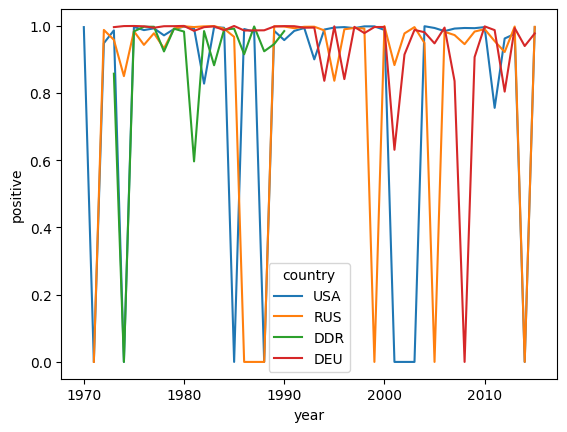

In [24]:
sns.lineplot(data=df.dropna().groupby(['year', 'country'])['positive'].mean().reset_index(), 
             x='year', 
             y='positive', 
             hue='country')

## Exercise 4 - Save the Data Frame

Save the data as 06.1 un-general-debates

In [25]:
#excelfilename = "Data/06.1 un-general-debates.csv"
#df.to_csv(excelfilename,index=False)